In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [22]:
pd.set_option('display.max_columns', 22)


In [3]:
df = pd.read_csv('health_fitness_dataset.csv')

In [23]:
df

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,103,6.6,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,102,8.1,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,126,6.2,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,141,7.2,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,112,7.1,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687696,3000,2024-12-19,38,F,165.7,112.9,Basketball,44,Medium,13.2,139,7.4,6,6911,1.9,20.7,66.5,127.0,75.5,NaN,Never,17.13
687697,3000,2024-12-20,38,F,165.7,113.1,Basketball,25,Low,6.3,113,8.5,6,8932,2.6,20.7,66.5,127.0,75.5,NaN,Never,17.16
687698,3000,2024-12-21,38,F,165.7,113.4,Yoga,97,Low,9.1,120,8.2,8,8864,1.8,20.7,66.5,127.0,75.5,NaN,Never,17.26
687699,3000,2024-12-22,38,F,165.7,113.6,Basketball,108,Medium,32.6,135,8.5,4,7455,2.1,20.7,66.5,127.0,75.5,NaN,Never,17.39


In [24]:
df.groupby('participant_id').head(5)


,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,103,6.6,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,102,8.1,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,126,6.2,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,141,7.2,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,112,7.1,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687480,3000,2024-01-01,38,F,165.7,57.1,Tennis,61,Medium,8.4,151,8.3,10,7947,2.1,20.7,66.5,127.0,75.5,NaN,Never,0.07
687481,3000,2024-01-02,38,F,165.7,57.3,Tennis,60,Medium,8.3,127,6.8,1,8672,2.0,20.7,66.5,127.0,75.5,NaN,Never,0.15
687482,3000,2024-01-04,38,F,165.7,57.6,Yoga,62,Low,3.0,119,7.4,6,9526,2.0,20.7,66.5,127.0,75.5,NaN,Never,0.21
687483,3000,2024-01-05,38,F,165.7,57.9,Swimming,52,High,8.2,139,7.4,5,10633,2.9,20.7,66.5,127.0,75.5,NaN,Never,0.28


In [5]:
print(df['activity_type'].value_counts())

activity_type
Yoga               69961
Weight Training    69661
HIIT               69376
Dancing            69193
Cycling            69187
Basketball         68536
Tennis             68533
Walking            68077
Swimming           68032
Running            67145
Name: count, dtype: int64


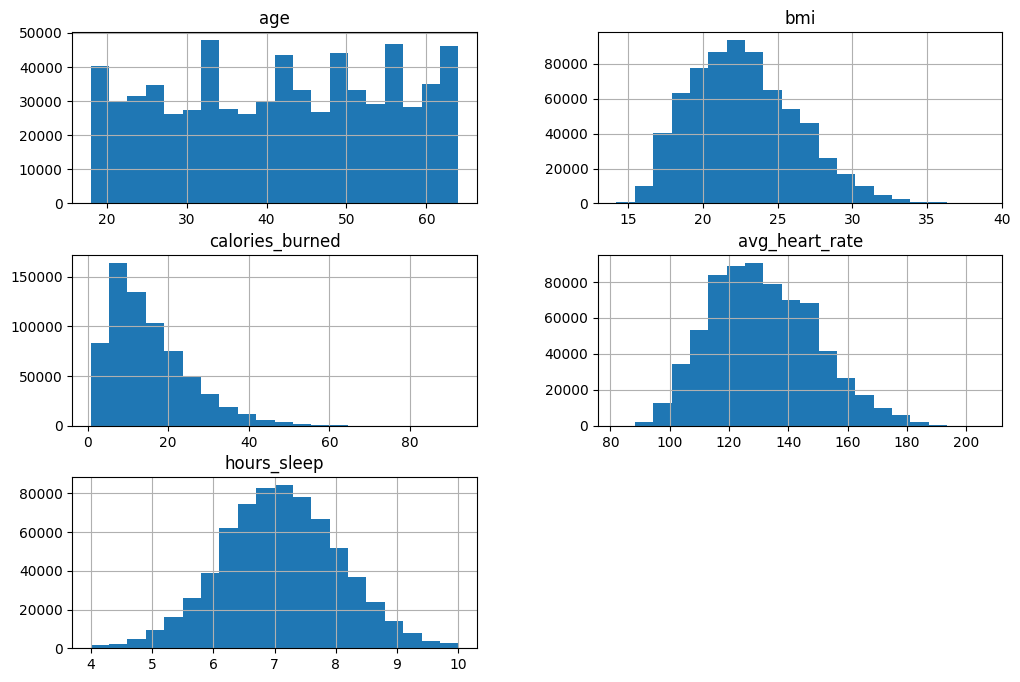

In [6]:
num_cols = ['age', 'bmi', 'calories_burned', 'avg_heart_rate', 'hours_sleep']
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.show()

In [26]:
df[df['participant_id'] == 1]

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,103,6.6,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,102,8.1,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,126,6.2,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,141,7.2,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,112,7.1,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1,2024-12-19,56,F,165.3,112.5,Swimming,103,Low,22.5,109,6.9,3,7661,3.3,19.6,69.5,110.7,72.9,NaN,Never,18.77
229,1,2024-12-20,56,F,165.3,112.7,Yoga,101,Medium,11.4,117,5.3,1,7065,3.1,19.6,69.5,110.7,72.9,NaN,Never,18.89
230,1,2024-12-21,56,F,165.3,113.0,Swimming,41,High,12.6,139,6.4,4,6981,1.7,19.6,69.5,110.7,72.9,NaN,Never,18.95
231,1,2024-12-22,56,F,165.3,113.3,Tennis,66,High,21.2,136,5.5,3,12278,2.4,19.6,69.5,110.7,72.9,NaN,Never,19.04


In [8]:
numerical_columns = [
    'weight_kg', 'bmi', 'duration_minutes', 'calories_burned', 'daily_steps',
    'avg_heart_rate', 'resting_heart_rate', 'hours_sleep', 'stress_level',
    'hydration_level', 'blood_pressure_systolic', 'blood_pressure_diastolic'
]

stats = pd.DataFrame({
    'Mean': df[numerical_columns].mean(),
    'Median': df[numerical_columns].median(),
    'Min': df[numerical_columns].min(),
    'Max': df[numerical_columns].max()
})

# Làm tròn kết quả đến 2 chữ số thập phân
stats = stats.round(2)

# Hiển thị kết quả
print("Thống kê cơ bản cho các biến số trong FitLife360:")
print(stats)

Thống kê cơ bản cho các biến số trong FitLife360:
                             Mean  Median    Min      Max
weight_kg                   94.92    94.6   45.3    188.4
bmi                         22.73    22.4   14.2     38.8
duration_minutes            70.01    70.0   20.0    120.0
calories_burned             15.38    13.0    0.8     92.0
daily_steps               8628.37  8607.0 -419.0  17241.0
avg_heart_rate             131.45   130.0   82.0    206.0
resting_heart_rate          70.01    70.0   51.1     87.1
hours_sleep                  7.05     7.0    4.0     10.0
stress_level                 5.25     5.0    1.0     10.0
hydration_level              2.50     2.5    1.5      3.5
blood_pressure_systolic    120.00   120.2   78.0    152.7
blood_pressure_diastolic    80.19    80.1   53.7    112.1


In [18]:
df.groupby('participant_id').count()

,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
participant_id,,,,,,,,,,,,,,,,,,,,,
1,233,233,233,233,233,233,233,233,233,233,...,233,233,233,233,233,233,233,0,233,233
2,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,0,242,242
3,227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,0,227,227
4,235,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,0,235,235
5,227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,0,227,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,232,232,232,232,232,232,232,232,232,232,...,232,232,232,232,232,232,232,0,232,232
2997,231,231,231,231,231,231,231,231,231,231,...,231,231,231,231,231,231,231,0,231,231
2998,222,222,222,222,222,222,222,222,222,222,...,222,222,222,222,222,222,222,222,222,222


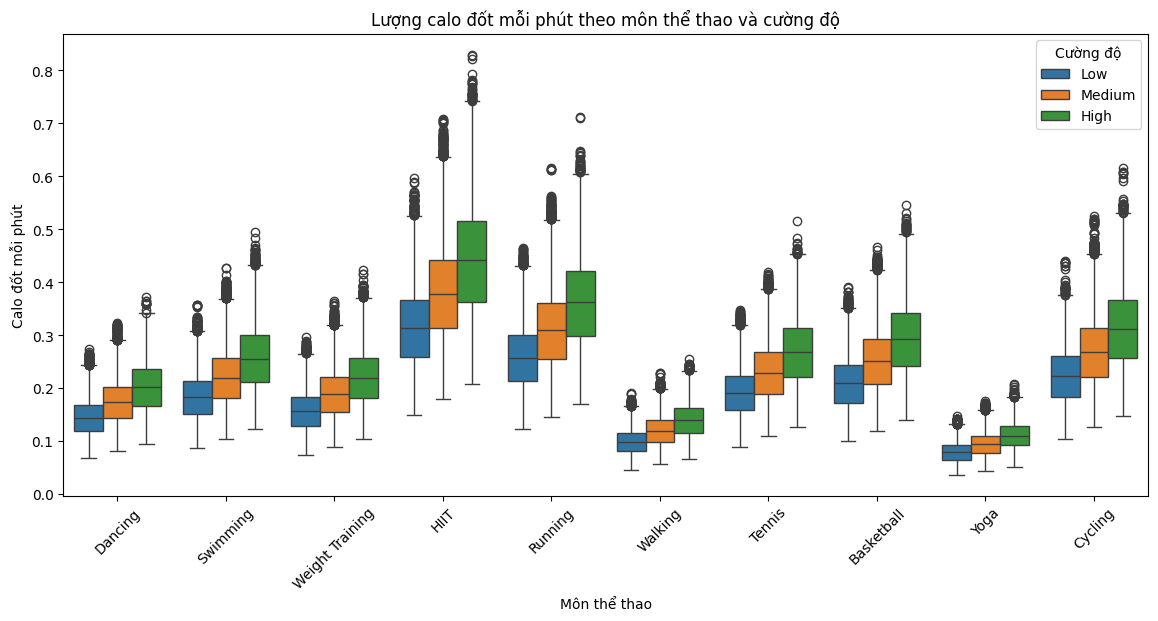

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='activity_type', y=df['calories_burned'] / df['duration_minutes'], hue='intensity')
plt.xticks(rotation=45)
plt.xlabel('Môn thể thao')
plt.ylabel('Calo đốt mỗi phút')
plt.title('Lượng calo đốt mỗi phút theo môn thể thao và cường độ')
plt.legend(title='Cường độ')
plt.show()


In [25]:
df['health_condition'].unique()


array([nan, 'Diabetes', 'Hypertension', 'Asthma'], dtype=object)

In [32]:
# Chọn các cột liên quan
features = ['duration_minutes', 'avg_heart_rate', 'daily_steps', 'intensity']
df_clean = df.dropna(subset=['calories_burned'] + features)  # Loại bỏ hàng có giá trị NaN

# Mã hóa intensity thành số
df_clean['intensity'] = df_clean['intensity'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Tạo X và y
X = df_clean[['duration_minutes', 'avg_heart_rate', 'daily_steps', 'intensity']]
y = df_clean['calories_burned']

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)


In [34]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')


MAE: 5.37
R² Score: 0.46


In [ ]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

            Feature  Coefficient
0  duration_minutes     0.219631
1    avg_heart_rate    -0.007237
2       daily_steps    -0.000615
3         intensity     2.729350


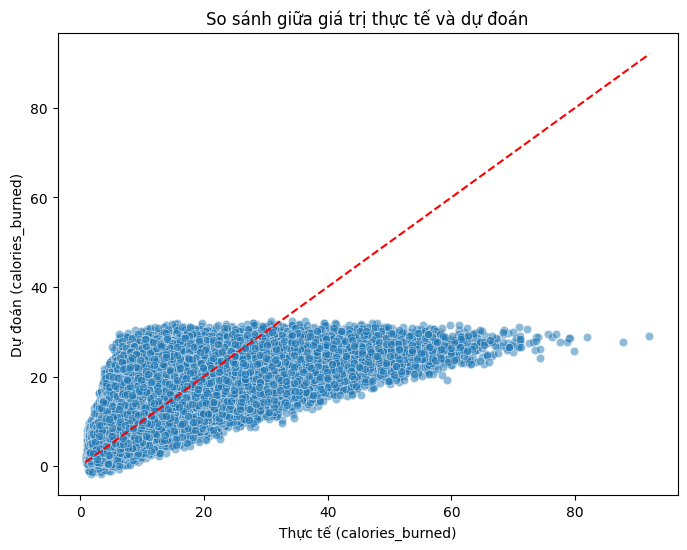

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='--')  # Đường y = x
plt.xlabel('Thực tế (calories_burned)')
plt.ylabel('Dự đoán (calories_burned)')
plt.title('So sánh giữa giá trị thực tế và dự đoán')
plt.show()